# Preliminaries

In [1]:
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import statsmodels as sm
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian
%matplotlib inline

# DATA PROCESSING

In [3]:
bcancer = datasets.load_breast_cancer()
bcancer_df = pd.DataFrame(data=bcancer.data, columns=bcancer.feature_names)

bcancer_df = bcancer_df.assign(target=pd.Series(bcancer.target))
bcancer_df.replace(to_replace={'target': {0: bcancer.target_names[0]}}, inplace=True)
bcancer_df.replace(to_replace={'target': {1: bcancer.target_names[1]}}, inplace=True)
bcancer_df["target"] = bcancer_df["target"].astype("category")
bcancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


# Exploratory Data Analysis

In [5]:
bcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    float64 
 14  smoothness

In [6]:
bcancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Observation: We can see that the dataset has no missing values.

Text(0.5, 0, 'Diagnosis')

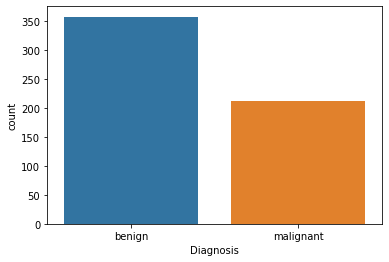

In [7]:
sns.countplot(x="target", data=bcancer_df)
plt.xlabel('Diagnosis')

Observation: We observed that the Wisconsin Breast Cancer datasets has more benign diagnosis.

In [8]:
# Actual Values
bcancer_df.groupby(["target"])["mean perimeter"].count()

target
benign       357
malignant    212
Name: mean perimeter, dtype: int64

# Let us check first if our dataset is not imbalance

In [9]:
X = bcancer_df.iloc[:,:-1]
Y = bcancer_df.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state =10)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test,Y_predict)

0.9415204678362573


col_0,benign,malignant
target,,
benign,107,5
malignant,5,54


In [13]:
Benign = 107/112
Malignant = 54/59
print(f'Benign: {Benign}')
print(f'Malignant: {Malignant}')

Benign: 0.9553571428571429
Malignant: 0.9152542372881356


Observation: Based on the above results , it shows that our dataset is not imbalance.

In [13]:
#Showing statistics of the dataset
bcancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<ipython-input-12-ef75648ce685>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


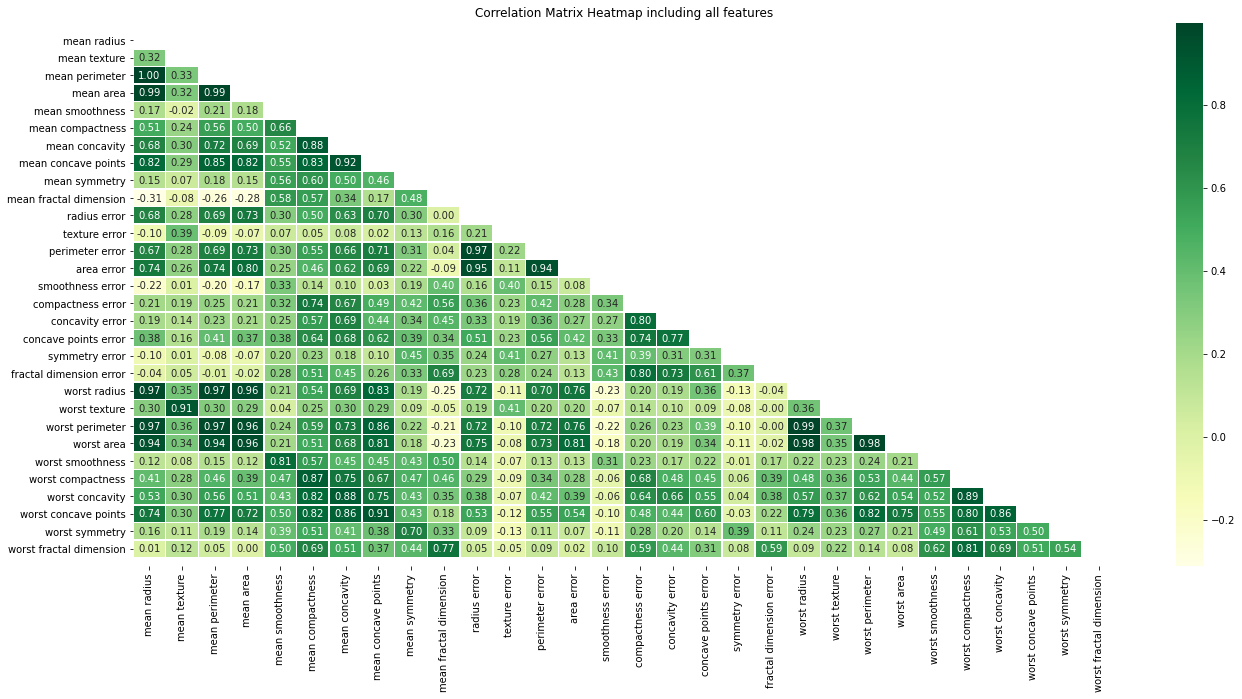

In [12]:
corr_matrix = bcancer_df.corr()  # Correlation Matrix

# Mask for Heatmap
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including all features");

Observation: Based on the above correlation matrix, we can see that there's multicollinearity.Thus, we can use feature selection in orther to improve our dataset.

# Feature Selection
   Since our dataset has a lot of features, we can select the best features for us to have a faster and more efficient model.

In [14]:
bcancer_df_copy = bcancer_df.copy()

In [15]:
bcancer_df_copy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [16]:
from sklearn.preprocessing import LabelEncoder
diagnosis_le = LabelEncoder()
bcancer_df_copy['target'] = diagnosis_le.fit_transform(bcancer_df['target'].values)
bcancer_df_copy.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


In [17]:
bcancer_df_dummy = pd.get_dummies(bcancer_df_copy, drop_first=True)

In [18]:
print(list(bcancer_df_dummy.columns))

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


In [19]:
X_clean = bcancer_df_dummy

In [20]:
X4 = bcancer_df_dummy.drop('target', axis=1)
Y4 = bcancer_df_dummy['target']

In [21]:
X4

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
# We use the base estimator LassoCV
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.70
sfm = SelectFromModel(clf)
sfm.fit(X4, Y4)
new_features = sfm.transform(X4).shape[1]

# Extracting the index of important features
feature_idx = sfm.get_support()

# Using the index to print the names of the important variables
new_cols = X4.columns[feature_idx]
new_cols

Index(['mean area', 'worst texture', 'worst perimeter', 'worst area'], dtype='object')

Observation: Using package SelectFromModel and LassoCV, we've extracted the most important features that we can use in our model which are the mean area, worst texture, worst perimeter and worst area.

In [27]:
X6 = X4[new_cols]
X6.head()

,mean area,worst texture,worst perimeter,worst area
0,1001.0,17.33,184.60,2019.0
1,1326.0,23.41,158.80,1956.0
2,1203.0,25.53,152.50,1709.0
3,386.1,26.50,98.87,567.7
4,1297.0,16.67,152.20,1575.0


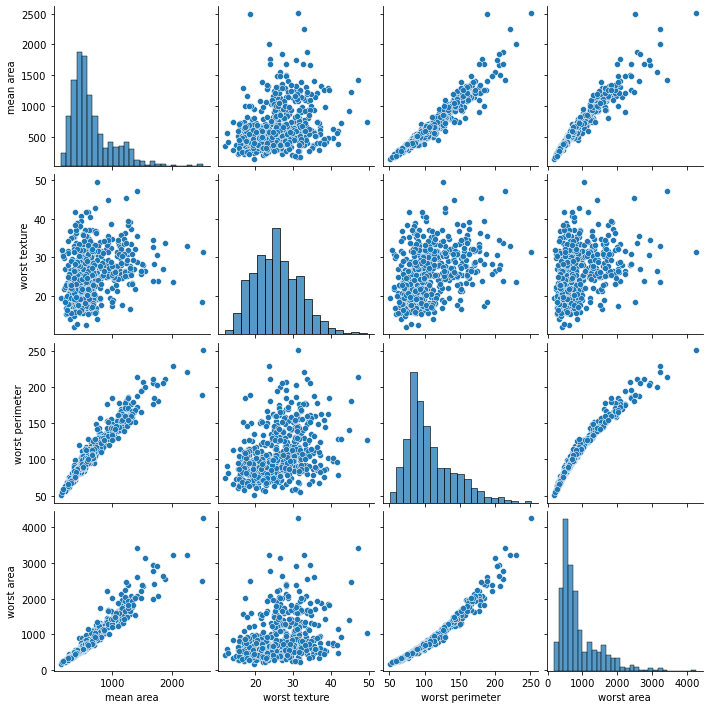

In [87]:
sns.pairplot(X6)

# Modeling
   We try to compare two Algorithms, Random Forest Classifier and Support Vector Machine since these both algorithms can        handle dataset under Supervised Learning and classification.

In [28]:
# Using Random Forest Classifier
from sklearn.model_selection import train_test_split
X2_train,X2_test, Y2_train, Y2_test = train_test_split(X6,Y,test_size = 0.3, random_state =10)

In [29]:
print("X_train shape: {}".format(X2_train.shape))
print("Y_train shape: {}".format(Y2_train.shape))

X_train shape: (398, 4)
Y_train shape: (398,)


In [30]:
print("X_test shape: {}".format(X2_test.shape))
print("Y_test shape: {}".format(Y2_test.shape))

X_test shape: (171, 4)
Y_test shape: (171,)


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, max_features=4, n_estimators=200)
model.fit(X2_train, Y2_train)
print('The Test Accuracy of the model is ', model.score(X2_test, Y2_test))

The Test Accuracy of the model is  0.9415204678362573


In [62]:
# Using Support Vector Machine
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X6, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [63]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X4_train, Y4_train)

#Predict the response for test dataset
Y_pred = clf.predict(X4_test)

In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("The Test Accuracy of the model is:",metrics.accuracy_score(Y4_test, Y_pred))

The Test Accuracy of the model is: 0.9707602339181286


Observation: We observed that using Support Vector Machine algorithm has higher accuracy with 97% compared with Random Forest Classifier with 94%. Thus, we choose to use Support Vector Machine as our algorithm in our model.

# Model Validation

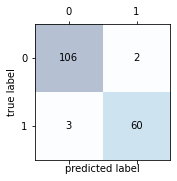

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98       108
   malignant       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [71]:
# Using Confusion Matrix and Classification Report to validate SVM algorithm
from sklearn.metrics import confusion_matrix, classification_report
confmat = confusion_matrix(y_true=Y4_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print(classification_report(Y4_test,Y_pred))

Observation: Based on the above cofusion matrix and classification report, it shows high Precision, Recall and F1-score and validated that Support Vector Machine algorithm is good to use in our model.

# Making Predictions

In [97]:
# We try import new data in order to predict if it's benign or malignant
import numpy as np
X1_new = np.array([[143,100,50,185]])
X1_new.shape

(1, 4)

In [89]:
bcancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [98]:
# Prediction using Support Vector Machine Algorithm
prediction_svm = clf.predict(X1_new)
print("Prediction: {}".format(prediction_svm))

Prediction: ['malignant']


Observation: With the above new data, we already predicted that it is a malignant tumor.

In [96]:
# Saving the model through Pickle
import pickle
import joblib

joblib.dump(clf,'model_bcancer.pkl')
model_from_joblib =joblib.load('model_bcancer.pkl')
model_from_joblib.predict(X4_test)

array(['benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'beni

# Summary

* Using the Support Vector Machine algorithm we are able to train the Wisconsin Breast cancer dataset and created a model with an accuracy of 97% which can be able to predict if the tumor is benign or malignant. Thus, this can help our healthcare industry to have an early diagnosis to all the patients with suspected breast cancer. 

# Recommendation

* Explore larger dataset and use our algorithm.
* Explore other algorithm and compare their accuracy to Support Vector Machine.

# References

* https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
* https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd
* Predictive Analytics samples from MDI Novare Data Science and Analytics Bootcamp Batch 1